<a href="https://colab.research.google.com/github/hargurjeet/Recommedation-Systems/blob/main/Books_Recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Upload kaggle.jason
# please follow this link incase not aware: https://www.kaggle.com/general/74235
from google.colab import files
files.upload()

! pip install opendatasets --upgrade
import opendatasets as od

dataset_url = 'https://www.kaggle.com/jealousleopard/goodreadsbooks'
od.download(dataset_url)

Saving kaggle.json to kaggle.json


100%|██████████| 622k/622k [00:00<00:00, 59.4MB/s]

In [9]:
df = pd.read_csv('/content/goodreadsbooks/books.csv', error_bad_lines=False)
df.head(2)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.


In [7]:
df.shape

(11123, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [10]:
df_relevant_data = df[['title','average_rating','ratings_count','text_reviews_count']]
df_relevant_data.head(2)

,title,average_rating,ratings_count,text_reviews_count
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,2095690,27591
1,Harry Potter and the Order of the Phoenix (Har...,4.49,2153167,29221


**Using Weighted average for each Books's Average Rating**
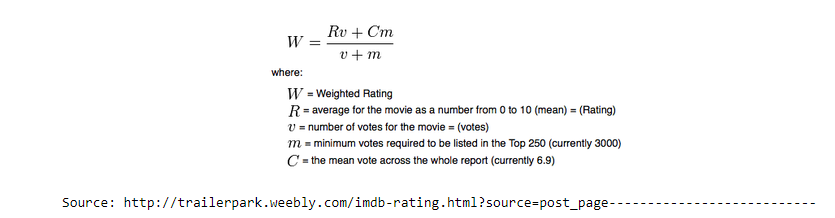


In [11]:
# Calculate all the components based on the above formula
v=df_relevant_data['ratings_count']
R=df_relevant_data['average_rating']
C=df_relevant_data['average_rating'].mean()
m=df_relevant_data['ratings_count'].quantile(0.70)

In [12]:
df_relevant_data['weighted_average']=((R*v)+ (C*m))/(v+m)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_relevant_data.head()

,title,average_rating,ratings_count,text_reviews_count,weighted_average
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,2095690,27591,4.569008
1,Harry Potter and the Order of the Phoenix (Har...,4.49,2153167,29221,4.489156
2,Harry Potter and the Chamber of Secrets (Harry...,4.42,6333,244,4.254414
3,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,2339585,36325,4.559125
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,41428,164,4.718051


In [15]:

books_sorted_ranking=df_relevant_data.sort_values('weighted_average',ascending=False)
books_sorted_ranking

,title,average_rating,ratings_count,text_reviews_count,weighted_average
6587,The Complete Calvin and Hobbes,4.82,32213,930,4.738274
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,41428,164,4.718051
6589,It's a Magical World (Calvin and Hobbes #11),4.76,23875,303,4.660409
6,Harry Potter Collection (Harry Potter #1-6),4.73,28242,808,4.647325
6588,The Calvin and Hobbes Tenth Anniversary Book,4.63,49122,368,4.586520
...,...,...,...,...,...
1940,The Mermaid Chair,3.13,68363,5816,3.166744
668,The Jane Austen Book Club,3.08,57720,3535,3.125839
6630,Lost,2.82,13152,904,3.042034
8812,Citizen Girl,2.40,5415,577,2.977993
